# Automatic Differentiation is not numerical differentiation

## Instructions:
 - Copy the notebook to your colab account;
 - Run the notebook with Shift-Enter at each cell;
 - Experiment and have fun!

## What is this demo about?

This demo will show you the difference between **Automatic Differentiation** (Autodiff), **algebraic differentiation** (the one you did in math classes) and **numerical differentiation** (coarse and shameless approximation to the derivative).

There are two flavors for Autodiff: the forward and the backward modes. Backpropagation is a particular case of the backward mode and we will see an example of the forward mode -- easier to code, and illustrative of the Autodiff behavior.

**For the forward Autodiff we will use the concept of dual numbers.**
A dual number is an extension of the real numbers.  Written out, the form looks similar to a complex number.

## Complex Numbers reviewed
A complex number has the form $$z = a + bi$$ where we *define* the number $i$ so that $i^{2} = -1$. 

Sometimes the imaginary unit is notated as $j$ (as in Python).

No real number has this property.  Hence the introduction of complex numbers.

Visually, you can think of a real number as a number lying on a straight line: the real line.  Then, we extend the real field to 2 dimensions.  The new axis is called the *imaginary* axis.

In [ ]:
def argand(a):
    import matplotlib.pyplot as plt
    import numpy as np
    fig, ax = plt.subplots()
    plt.axis("on")
    plt.grid()
    # left y-axis and bottim x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # clean axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Ticks on left and lower axes
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],'rs-')
    limit=np.max(np.ceil(np.absolute(a))) 

    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.arrow(0, -limit, 0, 1.9*limit, head_width=limit/20, head_length=limit/20, fc='k', ec='k');
    plt.arrow(-limit, 0, 1.9*limit, 0, head_width=limit/20, head_length=limit/20, fc='k', ec='k');

    #plt.ylabel(30*' '+'Im', horizontalalignment='left',rotation=0)
    #plt.xlabel('Re')
    ax.set_xlabel(80*' '+'Re')
    ax.set_ylabel(50*' '+'Im')
    plt.show()
  
a = [1+4j]
argand(a)

In [ ]:
a = [1+4j, -2+2j]
argand(a)

In [ ]:
a1 = 1+4j ; a2 = -2+2j
a = [a1, a2,a1+a2]
argand(a)

### A few properties and operations on complex numbers

$$z = a+b i$$


* Real part: $\text{Re}(z) = a$
* Imaginary part: $\text{Im}(z) = b$

* Complex conjugate: $z^{*} = a - bi$.
* Magnitude of a complex number: $\left|z\right|^{2} = zz^{*} = \left(a+bi\right)\left(a-bi\right) = a^{2} + b^{2}$.

* Summation: $z_1 + z_2 = (a_1 + a_2) + (b_1 + b_2)i$
* Multiplication: $z_1z_2 = (a_1+b_1i)(a_2+b_2i) = a_1a_2-\mathbf{b_1b_2} + (a_1b_2 +a_2b_1)i$ *->* **Feedback of the imaginary part to the real part**

In [ ]:
a1 = 1+4j ; a2 = -2+2j
a = [a1, a2, a1*a2]
argand(a)

## Definition of Dual Numbers
A dual number has a real part $a$ and a dual part $b$.  We write $$z = a + b \epsilon $$.

We *define* the number $\epsilon \not = 0$, so that $\epsilon^{2} = 0$.

**Note that $\epsilon$ is NOT zero!**  $\epsilon$ is not a real number. You can imagine that $\epsilon$ is a really small number. When you square it, it gets much much smaller.

#### Some properties of dual numbers:

* Real part: $\text{Re}(z) = a$
* Dual part: $\text{Dual}(z) = b$
* Conjugate:  $z^{*} = a - b \epsilon $.
* Magnitude: $\left|z\right|^{2} = zz^{*} = \left(a+ b \epsilon \right)\left(a- b \epsilon \right) = a^{2}$.
* Summation: $z_1 + z_2 = (a_1+a_2) + (b_1+b_2) \epsilon $.
*Multiplication: $z_1z_2 = (a_1a_2 +  b_1b_2\mathbf{\epsilon^2}) + (a_1b_2 + a_2b_1) \epsilon  = a_1a_2 +  (a_1b_2 + a_2b_1) \epsilon$ *->* **There is NO feedback of the dual part to the real part**




In [ ]:
# Motivation: take a small number, and square it
small = 1e-3
small, small**2

## Taylor series expansion
A smooth function $f$ can be written as an infinite sum of polynomials

 $$ f(x) = f(a) + \frac{f^\prime(a)}{1!}(x-a) + \frac{f^{\prime\prime}(a)}{2!}(x-a)^2 + \frac{f^{\prime\prime\prime}(a)}{3!}(x-a)^3 + \cdots $$

 
### Example: $e^x$

$$f(x) = e^x$$

Assume $a = 0$. Then,
$$f(x) = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!}+ \dots$$



In [ ]:
def ExpTaylor(n,x):
  import math
  term = 1
  for k in range(1,n+1):
    term += x**k/math.factorial(k)
    #print(term)
  return term

def PlotExpTaylor(n):
  import matplotlib.pyplot as plt
  import numpy as np
  x = np.arange(-2,2,0.1)
  eTaylor = [ExpTaylor(n,xi) for xi in x]

  fig, ax = plt.subplots()
  ax.plot(x, np.exp(x))
  ax.plot(x,eTaylor)
  ax.set_ylim([-2,np.exp(2)])
  ax.legend(['exp() function','Taylor Series'])
  plt.show()

PlotExpTaylor(0)

In [ ]:
PlotExpTaylor(1)

In [ ]:
PlotExpTaylor(3)

In [ ]:
PlotExpTaylor(6)

## Taylor series and the dual number

Lets apply the Taylor expansion to $ x = a+b \epsilon$

 $$ f(a+b \epsilon) = f(a) + \frac{f^\prime(a)}{1!} b \epsilon + \frac{f^{\prime\prime}(a)}{2!}b^2 \epsilon^2 + \frac{f^{\prime\prime\prime}(a)}{3!}b^3 \epsilon^2 \epsilon + \cdots $$

 And all terms that include multiplication by $\epsilon^2$ are zero! So, we see that, for all possible $a$ and $b$,

 $$ f(a+b \epsilon) = f(a) + f^\prime(a) b \epsilon $$



### Example
Recall that the derivative of $f(x)=x^{2}$ is $f^{\prime}(x) = 2x$.

Now if we extend $x$ so that it has a real part and a dual part ($x\leftarrow a + b \epsilon $) and evaluate $f$ we have
\begin{align}
  f(a + b \epsilon) &= \left(a + b \epsilon \right)^{2} \\
    &= a^{2} + 2ab\epsilon + \underbrace{b^{2}\epsilon^{2}}_{=0} \\
    &= a^{2} + 2ab\epsilon.
\end{align}

#### Notice that the real part is $f$ evaluated at $a$, and the dual part contains the derivative of our function evaluated at $a$!!

### Example
Evaluate $y = \sin\left(x\right)$ when $x\leftarrow a + b\epsilon$.

We have
\begin{align}
  y & = \sin\left(a + b \epsilon \right) \\
    & = \sin\left(a\right)\cos\left( b \epsilon\right) + \cos\left(a\right)\sin\left( b \epsilon\right).
\end{align}

Expanding $\cos$ and $\sin$ in their Taylor series gives 
\begin{align}
  \sin\left(b \epsilon \right) &= b \epsilon  + \dfrac{\left( b \epsilon \right)^{3}}{3!} + \cdots = b \epsilon \\
  \cos\left(b \epsilon \right) &= 1 + \dfrac{\left( b \epsilon \right)^{2}}{2} + \cdots = 1.
\end{align}
Remember that $\epsilon^2 =0$, and $\epsilon \not = 0$.

So we see that 
\begin{align}
  y & = \sin\left(a\right) + \cos\left(a\right) b \epsilon.
\end{align}
And once again the real component is the function and the dual component is the derivative times $b$. Make $b=1$... 

**And we have a closed-form computation for the derivative at a point a!!**



##Using Python Autograd



In [ ]:
import autograd
import autograd.numpy as np
autograd.grad(np.exp)(4.), np.exp(4.)

Square root function:

$$ f(x) = \sqrt(x)$$

Derivative:

$$f^\prime (x) = \frac{1}{2 \sqrt(x)}$$

Try using autograd

In [ ]:
def derivSqrt(x):
  import numpy as np
  return 1.0/2/np.sqrt(x)

def plotCompareSqrt():
  import matplotlib.pyplot as plt
  import autograd
  import autograd.numpy as np
  x = np.arange(0.1,2,0.05)
  dfdx = [derivSqrt(xi) for xi in x]
  autod = [autograd.grad(np.sqrt)(xi) for xi in x]
  fig, ax = plt.subplots()
  ax.plot(x, np.sqrt(x))
  ax.plot(x,dfdx)
  ax.plot(x,autod, 'o')
  ax.legend(['sqrt() function','Analytic (symbolic) derivative','Autodiff'])
  plt.show()

plotCompareSqrt()

Exercises

Take function $f$ defined as
$$
f(x) = e^{x^2}.
$$

1. Compute the derivative of $f$ by hand. Remember that if $u = x^2$, then $$\left . \frac{df}{dx}(x) \right|_{x=a} = \left. \frac{df}{du}\frac{du}{dx}(x)\right | _{x=a}.$$ 
1. Write a Python function receiving as arguments function $f$ and a step $h$ to approximate the derivative using finite differences, i.e., $$ \text{NumDiff}(f,h) = \frac{f(x+h) - f(x)}{h}.$$
1. Evaluate the functions from exercises 1 and 2 with $x \in [0.2,0.4]$, for $h \in \{0.1, 10^{-5}, 10^{-15}\}$ and plot the results. What can you conclude?
1. Deduce the expression of $f(a+\epsilon)$. You will need the property $\epsilon^2 = 0$ and the Taylor expansion above for $e^x$.
1. Create a class `DualNumber` and equip it with the necessary methods to perform dual number arithmetic, namely addition, multiplication and power of a number `n`.

1.  Write a new Python function to compute the derivative of $f$ using this class. Remember you will be evaluating function $f(x)$ on the dual number $x=a+\epsilon$. Compare the result in a plot also showing `NumDiff` and the symbolic derivative you computed in the first exercise.
 
1. Now use the Python package `autograd`to compute the exact derivative and plot the result.

1. Use `autograd` to compute the derivative of
$$
f(x) = e^{-(\sin(x) - 4\cos(x))^2}
$$




Solution:

1. $2xe^{x^2}$
1. Code below
1. Code below
1. $f(a+\epsilon) = e^{a^2+2a\epsilon} = e^{a^2}e^{2a\epsilon}=e^{a^2} (1+ 2a\epsilon)= e^{a^2} + 2ae^{a^2}\epsilon$
1. Code below
1. Code below
1. 
1. Code below

In [ ]:
def NumDiff(f,h):
  return lambda x:(f(x+h)-f(x))/h

def SymbolDer(x):
  import numpy as np
  return 2*x*np.exp(x**2)

def exercise3():
  import numpy as np
  import matplotlib.pyplot as plt
  x= np.linspace(.2,.4,15)
  def symbF():
    return lambda x:np.exp(x**2)
  
  setOfh = [.1, 1e-2, 1e-12, 1e-15]
  ndiff = [NumDiff(symbF(), h) for h in setOfh];
  for k in range(len(setOfh)):
    plt.plot(x, ndiff[k](x), label = 'h={}'.format(setOfh[k]))
  
  plt.plot(x, SymbolDer(x), 'o', label='true')
  plt.legend()
  plt.xlabel('x')
  plt.ylabel('Derivative(x)')
 
exercise3()



In [ ]:
class DualNumber():
  ''' Dual Number object for AD '''
  def __init__(self, a,b=1.0):
    ''' Constructur method '''
    self.a = a
    self.b = b
  def __add__(self, o):
    try:
      return DualNumber(self.a+o.a,self.b+o.b)
    except AttributeError:
      return DualNumber(self.a+o,self.b)
  def __mul__(self, o):
    return DualNumber(self.a*o.a,self.b*o.a+o.b*self.a)
  def __str__(self):
    return "a: %f, b: %f" % (self.a,self.b)
  def __pow__(self,n): 
    import functools
    return functools.reduce(lambda a,b: a*b, [self]*n)

## Exercise 6
def DualNumberExp(x):
    import numpy as np
    return DualNumber(np.exp(x.a), np.exp(x.a)*x.b)

a= 1.456  
y = DualNumber(a)
print(y), print("f: % f, f\': % f" %(a*a,2*a)), print(y*y), print(y**2),

In [ ]:
a = 1
y= DualNumber(a)
print(DualNumberExp(y**2))

 Use `autograd` to compute the derivative of
$$
f(x) = e^{-(\sin(x) - 4\cos(x))^2}
$$

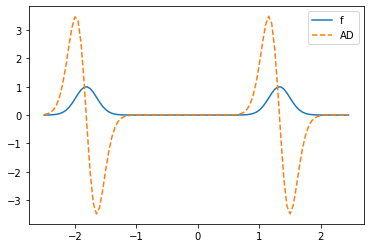

In [ ]:
def exercise8():
  import matplotlib.pyplot as plt
  import autograd
  import numpy as np
  x = np.arange(-2.5,2.5,0.05)
  def f(x):
    import autograd.numpy as np
    return np.exp(-(np.sin(x)-4*np.cos(x))**2)
  autod = [autograd.grad(f)(xi) for xi in x]
  fig, ax = plt.subplots()
  ax.plot(x, np.exp(-(np.sin(x)-4*np.cos(x))**2))
  ax.plot(x,autod, '--')
  ax.legend(['f','AD'])
  plt.show()

exercise8()